# The Data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.
https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=icml_face_data.csv

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [5]:
path = '../../../project_data/fer2013/icml_face_data.csv'
df = pd.read_csv(path)
df.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [6]:
# df.columns

#### Count and plot values in each set of images

In [7]:
print(f'Count of images in each set:\n{df[" Usage"].value_counts()}\n')

Count of images in each set:
Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64



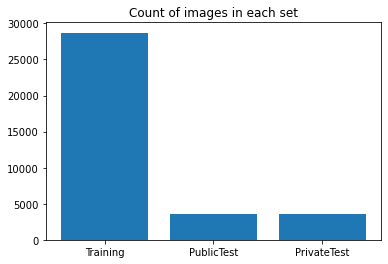

In [8]:
plt.title('Count of images in each set')
plt.bar(df[" Usage"].unique(), df[" Usage"].value_counts())
plt.show()

#### Count images in each label

In [9]:
print(f'Count of images in each set:\n{df.emotion.value_counts()}\n')

Count of images in each set:
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64



### Creating dataframes for test and train sets

In [10]:
# creating a dataframe that only contains training data
train = df[df[' Usage']=='Training'].copy()

# dropping the usage column
train.drop([' Usage'], axis = 1, inplace = True)
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [11]:
train.shape

(28709, 2)

In [12]:
# combining public and private tests into a one dataframe
public = df[df[' Usage']=='PublicTest'].copy()
private = df[df[' Usage']=='PrivateTest'].copy()

# concatenating into one test dataframe
test = pd.concat([public, private])

# dropping usage column
test.drop([' Usage'], axis = 1, inplace = True)

# reseting the index
test.reset_index(inplace = True, drop = True)
test.head()

,emotion,pixels
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,1,156 184 198 202 204 207 210 212 213 214 215 21...
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [13]:
test.shape

(7178, 2)

### Extract pixel values and reshape the arrays

In [14]:
def get_pixels_and_scale(data):
    '''
    Function for extracting pixel values from the pixel column and scaling them between 0 and 1
    
    get values from the column
    split on the whitespace
    convert to float16 datatype
    save as as numpy array
    scale the values between 0 and 1
    '''
    
    img_array = np.array(data.split(' '), dtype = 'float16')
    img_array = img_array / 255.0
    
    return img_array

In [15]:
train[' pixels'] = train[' pixels'].apply(get_pixels_and_scale)

# checking the result
train.head()

,emotion,pixels
0,0,"[0.2744, 0.3137, 0.3215, 0.2825, 0.2274, 0.227..."
1,0,"[0.5923, 0.5884, 0.5767, 0.608, 0.5806, 0.5215..."
2,2,"[0.906, 0.8315, 0.612, 0.643, 0.682, 0.541, 0...."
3,4,"[0.0941, 0.1255, 0.1412, 0.1177, 0.1255, 0.090..."
4,6,"[0.01569, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."


In [16]:
train.shape

(28709, 2)

In [17]:
def reshape_images(data):
    '''
    reshape pixels column into desired format
    return a numpy array
    '''

    reshaped_array = np.reshape(data[' pixels'].to_list(),(data.shape[0],48,48,1))
    
    return reshaped_array

In [18]:
train_images = reshape_images(train)
train_images.shape

(28709, 48, 48, 1)

In [19]:
# doing the same with the test data
test[' pixels'] = test[' pixels'].apply(get_pixels_and_scale)

# checking the result
test.head()

,emotion,pixels
0,0,"[0.996, 0.996, 0.996, 0.996, 0.996, 0.9766, 1...."
1,1,"[0.612, 0.7217, 0.7764, 0.792, 0.8, 0.8115, 0...."
2,4,"[0.2705, 0.4626, 0.2393, 0.2354, 0.3765, 0.474..."
3,6,"[0.8037, 0.796, 0.9253, 0.6157, 0.3254, 0.6196..."
4,3,"[0.341, 0.3098, 0.2903, 0.2588, 0.2903, 0.3765..."


In [20]:
test_images = reshape_images(test)
test_images.shape

(7178, 48, 48, 1)

#### Getting the labels

In [21]:
train_labels = train['emotion']
test_labels = test['emotion']

print(train_labels.shape,test_labels.shape)

(28709,) (7178,)


### Visualising random images

In [25]:
def plot_random_images(dataset): 
    if np.array_equal(dataset, train_images):
        labels = train_labels
    else:
        labels = test_labels

    # Checking 25 random images from the train set across all classes
    plt.figure(figsize=(12,12))
    for ind, img_num in enumerate(np.random.randint(1,len(dataset),size=25)):
        plt.subplot(5,5,ind+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(dataset[img_num], cmap='gray')
        plt.xlabel(emotions[labels[img_num]], size = 17)
    plt.show()

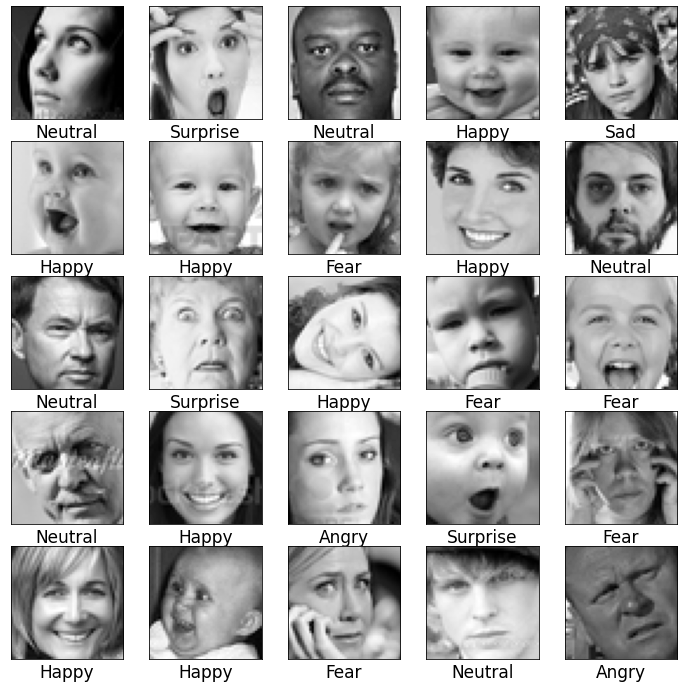

In [26]:
plot_random_images(train_images)

## Preprocessing in one step

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

path = '../../../project_data/fer2013/icml_face_data.csv' # added the last forward slash
df = pd.read_csv(path)

# creating a dataframe that only contains training data
train = df[df[' Usage']=='Training'].copy()

# dropping the usage column
train.drop([' Usage'], axis = 1, inplace = True)

# combining public and private tests into a one dataframe
public = df[df[' Usage']=='PublicTest'].copy()
private = df[df[' Usage']=='PrivateTest'].copy()

# concatenating into one test dataframe
test = pd.concat([public, private])

# dropping usage column
test.drop([' Usage'], axis = 1, inplace = True)

# reseting the index
test.reset_index(inplace = True, drop = True)

def get_pixels_and_scale(data):
    '''
    Function for extracting pixel values from the pixel column and scaling them between 0 and 1
    
    get values from the column
    split on the whitespace
    convert to float16 datatype
    save as as numpy array
    scale the values between 0 and 1
    '''
    
    img_array = np.array(data.split(' '), dtype = 'float16')
    img_array = img_array / 255.0
    
    return img_array

def reshape_images(data):
    '''
    reshape pixels column into desired format
    return a numpy array
    '''

    reshaped_array = np.reshape(data[' pixels'].to_list(),(data.shape[0],48,48,1))
    
    return reshaped_array

# def plot_random_images(dataset): 
#     if np.array_equal(dataset, train_images):
#         labels = train_labels
#     else:
#         labels = test_labels

#     # Checking 25 random images from the train set across all classes
#     plt.figure(figsize=(12,12))
#     for ind, img_num in enumerate(np.random.randint(1,len(dataset),size=25)):
#         plt.subplot(5,5,ind+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(dataset[img_num], cmap='gray')
#         plt.xlabel(emotions[labels[img_num]])
#     plt.show()
    

# extracting pixel values from the pixel column and scaling them between 0 and 1    
train[' pixels'] = train[' pixels'].apply(get_pixels_and_scale)   
test[' pixels'] = test[' pixels'].apply(get_pixels_and_scale)

# reshaping pixels column into a desired format and getting a numpy array
train_images = reshape_images(train)
test_images = reshape_images(test)

# getting the labels
train_labels = train['emotion']
test_labels = test['emotion']

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(28709, 48, 48, 1) (28709,)
(7178, 48, 48, 1) (7178,)
